<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#15B-Flux-transmission-problem" data-toc-modified-id="15B-Flux-transmission-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>15B Flux transmission problem</a></span></li></ul></div>

# Introduction



In the [flux_schwartzchild](https://clouds.eos.ubc.ca/~phil/courses/atsc301/flux_schwartzchild.html) notes I claimed
 that the following approximation was a good one:
 
 $$\hat{t}_f =  2 \int_0^1 \mu \exp \left (- \frac{\tau }{\mu} \right ) d\mu
       \approx  \exp \left (-1.66 \tau \right )$$
       
 We can check this with an exact answer, since this integral is important enough to have a function defined for it in the scipy math module.  First, be sure you understand how the change in variables 
 
 $$u = \mu^{-1}$$
 
 Transforms this equation into the **third exponential integral**:
 
 $$\hat{t}_f = 2 \int_1^\infty \frac{\exp(-u \tau)}{u^3} du$$
 
 The cell below graphs this function which in python is available as::
 
     scipy.special.expn(3,the_tau))
 
 

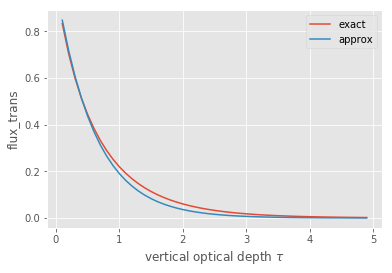

In [16]:
"""
   plot 2*scipy.special.expn(3,the_tau))
   this is the accurate version of the flux transmission function
   defined above
"""   
%matplotlib inline
from scipy.special import expn 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
tau = np.arange(0.1,5,0.1)
flux_trans = 2*expn(3.,tau)
fig, ax =plt.subplots(1,1)
ax.plot(tau,flux_trans,label='exact')
ax.plot(tau,np.exp(-1.66*tau),label='approx')
ax.legend()
ax.set(ylabel='flux_trans',xlabel=r'vertical optical depth $\tau$');

# 15B Flux transmission problem

In the cell below, add 2 lines to ax.

The first line should plot the numerical approximation to

$$\hat{t}_f = 2 \int_1^\infty \frac{\exp(-u \tau)}{u^3} du$$

using np.sum and np.diff as usual.  The x axis should use these tau values

    tau=np.arange(0.1,5,0.1)
    
Make the line green, with a linewidth of lw=5 so it stands out (it's too late
at this point to add it to the legend easily, although that can be done).

For the second line, plot the ordinary vertical transmission:

$$\hat{t} = \exp(-\tau)$$

for comparison, as a black line with lw=5.

To show the figure, the last line in your cell should be::

    display(fig)

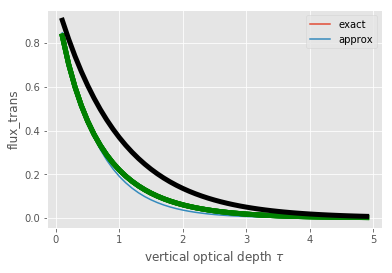

In [20]:
tau = np.arange(0.1,5,0.1)
def in_y(the_tau):
    mu = np.linspace(1.e-8, 1,5000)
    y = mu* np.exp(-the_tau/ mu)
    yavg = (y[1:] + y[:-1])/2.
    a= 2* np.sum(yavg*np.diff(mu))
    return a
tf=[]
for the_tau in tau:
    tf_n=in_y(the_tau)
    tf.append(tf_n)
ax.plot(tau,tf,'g',lw=5)

ax.plot(tau, np.exp(-tau), 'black', lw=5)

display(fig)